<a href="https://colab.research.google.com/github/ShoaibMuhammad123/ECG_Image_Classification/blob/main/MODEL_ECG_CNN_LSTM_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN and LSTM on ECG dataset of Images** (*Best Model*)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
''

''

In [ ]:
import torch

In [ ]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device

'cuda'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to dataset (Modify if necessary)
dataset_path = "/content/drive/MyDrive/Pytorch_Playlist/ECG_DATA/"

train_path = dataset_path + "train/"
test_path = dataset_path + "test/"


In [ ]:
train_path

'/content/drive/MyDrive/Pytorch_Playlist/ECG_DATA/train/'

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),         # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize (Optional)
])


In [ ]:
# Load training dataset
train_dataset = datasets.ImageFolder(root=train_path,transform=transform)

# Load testing dataset
test_dataset = datasets.ImageFolder(root=test_path,transform=transform)
#

In [ ]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 2368
    Root location: /content/drive/MyDrive/Pytorch_Playlist/ECG_DATA/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

In [ ]:
# test_dataset

In [ ]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 928
    Root location: /content/drive/MyDrive/Pytorch_Playlist/ECG_DATA/test/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

In [ ]:
from torchvision import datasets


dat = datasets.ImageFolder(train_path)

# Get the class-to-index mapping
class_to_idx = dat.class_to_idx


print(class_to_idx)

{'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0, 'ECG Images of Patient that have History of MI (172x12=2064)': 1, 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2, 'Normal Person ECG Images (284x12=3408)': 3}


In [ ]:
#Create DataLoader instances for both datasets
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
for fet,lab in train_dataloader:
  print(fet,lab)
  break

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
        

### **Custom Dataset Class and Data Loader**

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

class LSTMImageDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Load image and label
        image, label = self.dataset[idx]

        # Convert image to numpy array (C, H, W)
        image = image.numpy()  # Convert from tensor to numpy array

        # Reshape the image to (H, W * C)
        image_reshaped = image.transpose(1, 2, 0).reshape(224, 224 * 3)  # Shape (224, 672)

        # Convert back to tensor
        image_tensor = torch.tensor(image_reshaped, dtype=torch.float32)

        return image_tensor, label

# Apply the custom Dataset class for both train and test sets
train_lstm_dataset = LSTMImageDataset(train_dataset)
test_lstm_dataset = LSTMImageDataset(test_dataset)

# Create DataLoader instances for both LSTM datasets
train_lstm_dataloader = DataLoader(train_lstm_dataset, batch_size=32, shuffle=True)
test_lstm_dataloader = DataLoader(test_lstm_dataset, batch_size=32, shuffle=False)


In [ ]:
train_lstm_dataset[0]

(tensor([[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]),
 0)

In [ ]:
for fet,lab in train_lstm_dataloader:
  print(fet,lab)
  break

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        ...,

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1., 

In [ ]:
len(train_lstm_dataloader)

74

## CNN and LSTM

In [ ]:
import torch
import torch.nn as nn


class CNN_LSTM_Model(nn.Module):
    def __init__(self, hidden_size, num_classes):
        super(CNN_LSTM_Model, self).__init__()

        # Define CNN layers
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # Conv layer 1
            nn.ReLU(),
            nn.MaxPool2d(2),  # Maxpool layer 1 (reduces spatial size by half)

            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # Conv layer 2
            nn.ReLU(),
            nn.MaxPool2d(2),  # Maxpool layer 2 (reduces spatial size by half)
        )

        # Define LSTM layer
        # After the CNN layers, the output size would be 64 x 56 x 56 (flattened)
        self.lstm = nn.LSTM(64 * 56 * 56, hidden_size, batch_first=True)

        # Fully connected layer to output class scores
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Apply CNN layers to extract features
        x = self.cnn(x)

        # Flatten the CNN output to (batch_size, timesteps, input_size)
        # After two max-pooling layers, the output size is (batch_size, 64, 56, 56)
        x = x.view(x.size(0), -1, 64 * 56 * 56)  # Flatten to (batch_size, timesteps, input_size)

        # Apply LSTM
        lstm_out, (h_n, c_n) = self.lstm(x)

        # We use the last LSTM output for classification
        last_out = lstm_out[:, -1, :]  # Get the output of the last time step

        # Apply FC layer to get class scores
        out = self.fc(last_out)

        return out



In [ ]:
# Model parameters
hidden_size = 128  # Size of LSTM hidden layer
num_classes = len(train_dataset.classes)  # Number of classes in the dataset

# Initialize the model
model = CNN_LSTM_Model(hidden_size, num_classes)

# Move the model to GPU
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)  # Optimizer

# Training loop

In [ ]:
epochs = 20
learning_rate= 1e-4

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Move data to device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Backward pass (compute gradients)
        loss.backward()

        # Update the weights
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_dataloader):.4f}')


Epoch [1/20], Loss: 1.3082
Epoch [2/20], Loss: 1.1661
Epoch [3/20], Loss: 0.8388
Epoch [4/20], Loss: 0.5821
Epoch [5/20], Loss: 0.4074
Epoch [6/20], Loss: 0.2988
Epoch [7/20], Loss: 0.2242
Epoch [8/20], Loss: 0.1775
Epoch [9/20], Loss: 0.1443
Epoch [10/20], Loss: 0.1171
Epoch [11/20], Loss: 0.0992
Epoch [12/20], Loss: 0.0856
Epoch [13/20], Loss: 0.0745
Epoch [14/20], Loss: 0.0654
Epoch [15/20], Loss: 0.0596
Epoch [16/20], Loss: 0.0526
Epoch [17/20], Loss: 0.0473
Epoch [18/20], Loss: 0.0428
Epoch [19/20], Loss: 0.0387
Epoch [20/20], Loss: 0.0352


# **Evaluation on Testing Data**

Test Accuracy: 100.00%


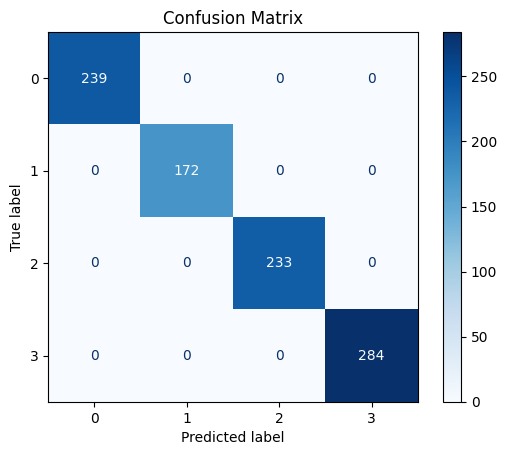

In [ ]:
# model.eval()  # Set the model to evaluation mode
# correct = 0
# total = 0

# with torch.no_grad():  # No gradients needed for evaluation
#     for inputs, labels in test_dataloader:
#         # Move data to device (GPU or CPU)
#         inputs, labels = inputs.to(device), labels.to(device)

#         # Forward pass
#         outputs = model(inputs)

#         # Get predictions
#         _, predicted = torch.max(outputs, 1)

#         # Calculate accuracy
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# accuracy = 100 * correct / total
# print(f'Test Accuracy: {accuracy:.2f}%')




from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

all_preds = []
all_labels = []

with torch.no_grad():  # No gradients needed for evaluation
    for inputs, labels in test_dataloader:
        # Move data to device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get predictions
        _, predicted = torch.max(outputs, 1)

        # Store for confusion matrix
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Accuracy
accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# **Evaluating on training data**

Train Accuracy: 100.00%


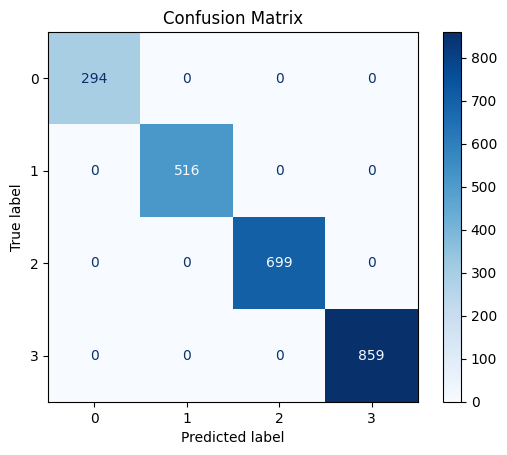

In [ ]:

model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

all_preds = []
all_labels = []

with torch.no_grad():  # No gradients needed for evaluation
    for inputs, labels in train_dataloader:
        # Move data to device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get predictions
        _, predicted = torch.max(outputs, 1)

        # Store for confusion matrix
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Accuracy
accuracy = 100 * correct / total
print(f'Train Accuracy: {accuracy:.2f}%')

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **------------------------------Completed------------------------------------**

## Getting a single image from data loder and displaying that

torch.Size([3, 224, 224])
tensor(2)
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


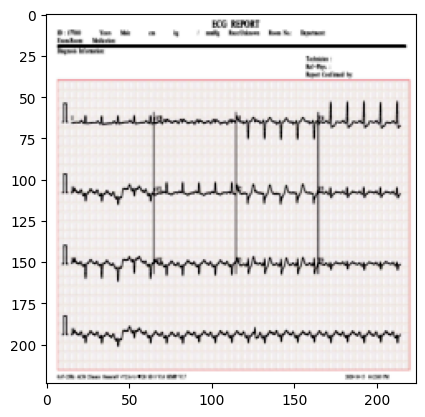

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T


for fet,lab in train_dataloader:
  # print(fet,lab)
  single_img = fet[8]
  single_lab = lab[8]

  print(single_img.shape)
  print(single_lab)

  print(single_img[:])

  # Assuming single_img is a tensor of shape [3, 224, 224] (C, H, W)
  # Convert the tensor to [H, W, C] format for imshow, since matplotlib expects this format.

  img_to_show = single_img.permute(1, 2, 0).cpu().numpy()  # Convert to HWC format

  # Display the image
  plt.imshow(img_to_show)
  plt.show()
  break

# **Passing single image for prediction**

In [ ]:
for inputs, labels in train_dataloader:

    # Take the first image from the batch (index 0)
    img_tensor = inputs[0].unsqueeze(0)  # Unsqueeze to add the batch dimension: [1, C, H, W]
    label = labels[0]  # Corresponding label of the image (optional, if you want to check)

    # print(img_tensor.shape)
    print('Actual label:',label)

    # 2. Move the image tensor to the same device as the model
    img_tensor = img_tensor.to(device)


    # Set the model to evaluation mode
    model.eval()

    with torch.no_grad():  # No need to compute gradients for inference
        # Forward pass
        outputs = model(img_tensor)
        # print(outputs)

    # 4. Get the predicted class (the index with the highest logit)
    _, predicted_class = torch.max(outputs, 1)  # Get the index with the max score
    predicted_class = predicted_class.item()
    print('predicted label:',predicted_class)
    break

Actual label: tensor(2)
predicted label: 2
